### Importing AIGCIQA dataset from Huggingface datasets library

In [1]:
from datasets import load_dataset
ds = load_dataset("strawhat/aigciqa-20k")
ds

g:\sem 4\mini project\project\src\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
g:\sem 4\mini project\project\src\.venv\Lib\site-packages\multiprocess\connection.py:335: SyntaxWarning: 'return' in a 'finally' block
  return f
g:\sem 4\mini project\project\src\.venv\Lib\site-packages\multiprocess\connection.py:337: SyntaxWarning: 'return' in a 'finally' block
  return self._get_more_data(ov, maxsize)


DatasetDict({
    train: Dataset({
        features: ['name', 'prompt', 'mos'],
        num_rows: 14000
    })
    validation: Dataset({
        features: ['name', 'prompt', 'mos'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['name', 'prompt', 'mos'],
        num_rows: 4000
    })
})

### Flattening the dataset

Currently the dataset is splitted into train, validation and test sets.<br> 
To Calculate the mean opinion score, we will flatten the dataset.

In [2]:
from datasets import concatenate_datasets

fd = concatenate_datasets([
    ds["train"],
    ds["validation"],
    ds["test"]
])

# convert to pandas
fd=fd.to_pandas()

fd.head()


,name,prompt,mos
0,DALLE2_0000.png,A cyberpunk gopnik on the street of a Soviet s...,3.663887
1,DALLE2_0002.png,portrait of a girl in her 20 s with wavy black...,4.173802
2,DALLE2_0003.png,a futuristic cowboy firing a glowing revolver ...,2.999392
3,DALLE2_0004.png,"robotic pit bull with a rocket launcher, reali...",3.644606
4,DALLE2_0005.png,luminous magical paper scroll floating in the ...,3.984836


### Plotting the mos dataset

In [3]:
import matplotlib.pyplot as plt

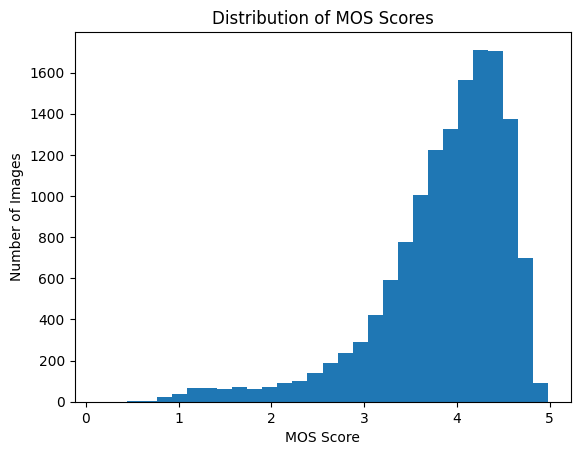

In [4]:
plt.figure()
plt.hist(fd["mos"], bins=30)
plt.xlabel("MOS Score")
plt.ylabel("Number of Images")
plt.title("Distribution of MOS Scores")
plt.show()

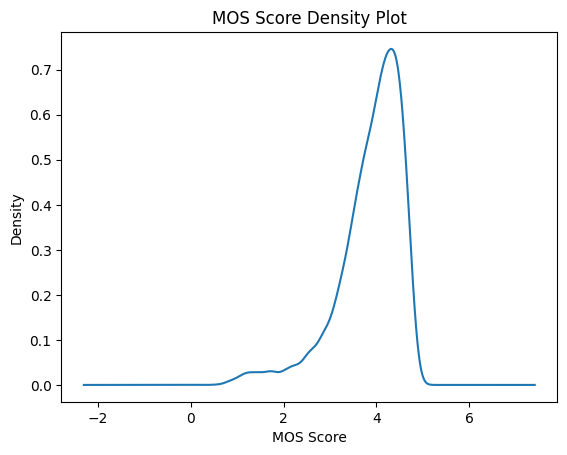

In [5]:
fd["mos"].plot(kind="density")
plt.xlabel("MOS Score")
plt.title("MOS Score Density Plot")
plt.show()